In [1]:
import seaborn as sns 
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn import cluster

Chargement du fichier csv 

In [2]:
from google.colab import files
uploaded = files.upload()

Saving players_22.csv to players_22 (1).csv


In [3]:
import io
df= pd.read_csv(io.BytesIO(uploaded['players_22.csv']),encoding="ISO-8859-1")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (25,108) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
df.head()

,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,dob,height_cm,weight_kg,club_team_id,club_name,league_name,league_level,club_position,club_jersey_number,club_loaned_from,club_joined,club_contract_valid_until,nationality_id,nationality_name,nation_team_id,nation_position,nation_jersey_number,preferred_foot,weak_foot,skill_moves,international_reputation,work_rate,body_type,real_face,release_clause_eur,player_tags,player_traits,pace,shooting,passing,...,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel AndrÃ©s Messi Cuccittini,"RW, ST, CF",93,93,78000000.0,320000.0,34,1987-06-24,170,72,73.0,Paris Saint-Germain,French Ligue 1,1.0,RW,30.0,NaN,2021-08-10,2023.0,52,Argentina,1369.0,RW,10.0,Left,4,4,5,Medium/Low,Unique,Yes,144300000.0,"#Dribbler, #Distance Shooter, #FK Specialist, ...","Finesse Shot, Long Shot Taker (AI), Playmaker ...",85.0,92.0,91.0,...,35,24,6,11,15,14,8,NaN,89+3,89+3,89+3,92,93,93,93,92,93,93,93,91+2,87+3,87+3,87+3,91+2,66+3,64+3,64+3,64+3,66+3,61+3,50+3,50+3,50+3,61+3,19+3,https://cdn.sofifa.net/players/158/023/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,https://cdn.sofifa.net/teams/1369/60.png,https://cdn.sofifa.net/flags/ar.png
1,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,ST,92,92,119500000.0,270000.0,32,1988-08-21,185,81,21.0,FC Bayern MÃ¼nchen,German 1. Bundesliga,1.0,ST,9.0,NaN,2014-07-01,2023.0,37,Poland,1353.0,RS,9.0,Right,4,4,5,High/Medium,Unique,Yes,197200000.0,"#Aerial Threat, #Distance Shooter, #Clinical F...","Solid Player, Finesse Shot, Outside Foot Shot,...",78.0,92.0,79.0,...,42,19,15,6,12,8,10,NaN,90+2,90+2,90+2,85,88,88,88,85,86+3,86+3,86+3,84+3,80+3,80+3,80+3,84+3,64+3,66+3,66+3,66+3,64+3,61+3,60+3,60+3,60+3,61+3,19+3,https://cdn.sofifa.net/players/188/545/22_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/flags/de.png,https://cdn.sofifa.net/teams/1353/60.png,https://cdn.sofifa.net/flags/pl.png
2,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",91,91,45000000.0,270000.0,36,1985-02-05,187,83,11.0,Manchester United,English Premier League,1.0,ST,7.0,NaN,2021-08-27,2023.0,38,Portugal,1354.0,ST,7.0,Right,4,5,5,High/Low,Unique,Yes,83300000.0,"#Aerial Threat, #Dribbler, #Distance Shooter, ...","Power Free-Kick, Flair, Long Shot Taker (AI), ...",87.0,94.0,80.0,...,32,24,7,11,15,14,11,NaN,90+1,90+1,90+1,88,89,89,89,88,86+3,86+3,86+3,86+3,78+3,78+3,78+3,86+3,63+3,59+3,59+3,59+3,63+3,60+3,53+3,53+3,53+3,60+3,20+3,https://cdn.sofifa.net/players/020/801/22_120.png,https://cdn.sofifa.net/teams/11/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1354/60.png,https://cdn.sofifa.net/flags/pt.png
3,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos JÃºnior,"LW, CAM",91,91,129000000.0,270000.0,29,1992-02-05,175,68,73.0,Paris Saint-Germain,French Ligue 1,1.0,LW,10.0,NaN,2017-08-03,2025.0,54,Brazil,NaN,NaN,NaN,Right,5,5,5,High/Medium,Unique,Yes,238700000.0,"#Speedster, #Dribbler, #Playmaker, #FK Special...","Injury Prone, Flair, Speed Dribbler (AI), Play...",91.0,83.0,86.0,...,32,29,9,9,15,15,11,NaN,83+3,83+3,83+3,90,88,88,88,90,89+2,89+2,89+2,89+2,82+3,82+3,82+3,89+2,67+3,63+3,63+3,63+3,67+3,62+3,50+3,50+3,50+3,62+3,20+3,https://cdn.sofifa.net/players/190/871/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,NaN,https://cdn.sofifa.net/flags/br.png
4,192985,https://sofifa.com/player/192985/kevin-de-bruy...,K. De Bruyne,Kevin 

In [5]:
len(df.columns)

110

In [6]:
for var in df.columns:
  print(var)

sofifa_id
player_url
short_name
long_name
player_positions
overall
potential
value_eur
wage_eur
age
dob
height_cm
weight_kg
club_team_id
club_name
league_name
league_level
club_position
club_jersey_number
club_loaned_from
club_joined
club_contract_valid_until
nationality_id
nationality_name
nation_team_id
nation_position
nation_jersey_number
preferred_foot
weak_foot
skill_moves
international_reputation
work_rate
body_type
real_face
release_clause_eur
player_tags
player_traits
pace
shooting
passing
dribbling
defending
physic
attacking_crossing
attacking_finishing
attacking_heading_accuracy
attacking_short_passing
attacking_volleys
skill_dribbling
skill_curve
skill_fk_accuracy
skill_long_passing
skill_ball_control
movement_acceleration
movement_sprint_speed
movement_agility
movement_reactions
movement_balance
power_shot_power
power_jumping
power_stamina
power_strength
power_long_shots
mentality_aggression
mentality_interceptions
mentality_positioning
mentality_vision
mentality_penalties


In [7]:
list_var=['short_name','age', 'height_cm', 'weight_kg',"player_positions", 'overall', 'potential',
'value_eur', 'wage_eur', 'international_reputation', 'weak_foot',
'skill_moves', 'release_clause_eur', 'pace', 'shooting',
'passing', 'dribbling', 'defending', 'physic','attacking_crossing', 'attacking_finishing',
'attacking_heading_accuracy', 'attacking_short_passing',
'attacking_volleys', 'skill_dribbling', 'skill_curve',
'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
'movement_acceleration', 'movement_sprint_speed', 'movement_agility',
'movement_reactions', 'movement_balance', 'power_shot_power',
'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots',
'mentality_aggression', 'mentality_interceptions',
'mentality_positioning', 'mentality_vision', 'mentality_penalties',
'mentality_composure', 'defending_marking_awareness', 'defending_standing_tackle',
'defending_sliding_tackle']

In [8]:
df=df[list_var]

In [9]:
len(df)

19239

In [10]:
df=df[(df["age"]<=25) & (df["overall"]>= 80) & (df["player_positions"] != "GK") ]

In [11]:
X=df[['short_name','age', 'height_cm', 'weight_kg', 'overall', 'potential', 'weak_foot','skill_moves', 'pace', 'shooting','passing', 'dribbling', 'defending', 'physic','attacking_crossing', 'attacking_finishing','attacking_heading_accuracy', 'attacking_short_passing','attacking_volleys', 'skill_dribbling', 'skill_curve','skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control','movement_acceleration', 'movement_sprint_speed', 'movement_agility','movement_reactions', 'movement_balance', 'power_shot_power','power_jumping', 'power_stamina', 'power_strength', 'power_long_shots','mentality_aggression', 'mentality_interceptions','mentality_positioning', 'mentality_vision', 'mentality_penalties','mentality_composure', 'defending_marking_awareness', 'defending_standing_tackle','defending_sliding_tackle']]

In [12]:
X

,short_name,age,height_cm,weight_kg,overall,potential,weak_foot,skill_moves,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle
6,K. MbappÃ©,22,182,73,91,95,4,5,97.0,88.0,80.0,92.0,36.0,77.0,78,93,72,85,83,93,80,69,71,91,97,97,92,93,83,86,78,88,77,82,62,38,92,82,79,88,26,34,32
29,E. Haaland,20,194,94,88,93,3,3,89.0,91.0,65.0,80.0,45.0,88.0,47,94,69,77,88,78,77,62,51,85,82,94,75,88,72,94,74,82,93,87,85,43,89,71,76,84,44,43,30
43,F. de Jong,24,180,74,87,92,3,4,81.0,69.0,85.0,88.0,77.0,78.0,78,72,72,91,70,88,84,64,87,89,80,82,88,88,79,68,76,90,74,66,75,82,77,86,45,90,76,76,77
44,T. Alexander-Arnold,22,180,69,87,92,4,3,79.0,68.0,88.0,80.0,80.0,72.0,92,60,69,86,62,78,87,85,90,86,77,80,73,82,73,82,66,88,63,75,74,82,77,87,55,81,80,83,79
45,J. Sancho,21,180,76,87,91,3,5,81.0,76.0,82.0,91.0,36.0,65.0,82,83,38,87,83,92,84,65,70,90,85,78,91,85,90,73,51,77,68,65,44,39,83,87,62,86,32,39,32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
503,L. DÃ­az,24,180,73,80,86,4,4,92.0,77.0,70.0,82.0,32.0,71.0,75,76,50,71,68,85,72,47,66,79,92,92,86,79,71,82,72,83,66,82,66,21,79,72,44,81,28,36,34
504,N. VlaÅ¡iÄ,23,178,79,80,86,5,3,83.0,77.0,78.0,82.0,48.0,71.0,71,76,65,81,72,85,70,72,77,80,82,83,78,78,88,80,55,80,69,81,68,26,77,82,66,77,54,55,37
505,Pedro Porro,21,176,71,80,87,3,3,80.0,67.0,73.0,79.0,75.0,75.0,80,61,66,75,53,79,65,67,71,82,76,83,78,78,71,81,59,83,73,74,74,76,75,68,46,78,74,78,75
506,V. Tsygankov,23,178,72,80,86,4,4,85.0,73.0,78.0,80.0,45.0,57.0,77,75,45,80,68,80,72,76,73,81,84,85,82,78,73,70,50,74,49,74,57,39,75,80,73,76,62,36,37


In [13]:
features=['age', 'height_cm', 'weight_kg', 'overall', 'potential', 'weak_foot','skill_moves', 'pace', 'shooting','passing', 'dribbling', 'defending', 'physic','attacking_crossing', 'attacking_finishing','attacking_heading_accuracy', 'attacking_short_passing','attacking_volleys', 'skill_dribbling', 'skill_curve','skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control','movement_acceleration', 'movement_sprint_speed', 'movement_agility','movement_reactions', 'movement_balance', 'power_shot_power','power_jumping', 'power_stamina', 'power_strength', 'power_long_shots','mentality_aggression', 'mentality_interceptions','mentality_positioning', 'mentality_vision', 'mentality_penalties','mentality_composure', 'defending_marking_awareness', 'defending_standing_tackle','defending_sliding_tackle']

In [14]:
sc=StandardScaler()
sc.fit(X[features])

StandardScaler()

In [15]:
X_=sc.transform(X[features])

Kmeans

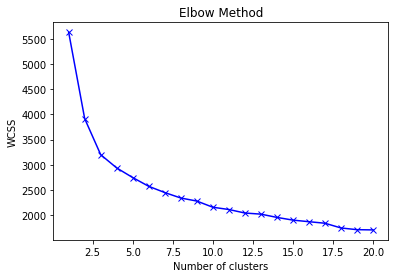

In [16]:
wcss = []
for i in range(1, 21):
    
    kmeans = cluster.KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X_)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 21), wcss,'bx-')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

#best k=3

In [17]:
kmeans = cluster.KMeans(n_clusters=3)
kmeans.fit(X_)

KMeans(n_clusters=3)

In [18]:
from collections import Counter
result_label=kmeans.labels_
print(Counter(result_label))
df["label"]=result_label

Counter({2: 57, 1: 50, 0: 27})


ACP

In [19]:
from sklearn.decomposition import PCA
pca = PCA()
x_pca = pca.fit_transform(X_)
x_pca = pd.DataFrame(x_pca)
x_pca.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41
0,-6.897830,1.368765,5.397565,-4.023364,2.641175,-0.298684,-1.095731,0.768597,-0.030112,-0.197591,0.619890,0.403187,-0.469553,0.145603,0.440612,0.742597,0.420876,-0.157183,-0.219603,0.279776,-0.239566,0.146024,0.143392,0.455523,-0.268842,-0.556327,-0.149046,-0.065564,-0.223545,-0.216891,-0.126743,0.319564,0.084975,-0.126380,0.229779,-0.052544,0.031763,-0.006011,-0.003550,-0.022672,-0.007414,0.003892
1,-1.530963,3.787734,6.980272,-1.363175,1.360263,0.496341,1.294984,-0.975284,2.850034,-0.576344,-0.635347,0.512660,0.830468,0.183067,0.587632,-0.121353,-0.680529,0.405250,0.124973,-0.790662,0.024115,0.333935,-0.530444,0.437091,-0.411853,0.462464,-0.399872,0.217164,-0.276637,0.230075,-0.296922,-0.367423,-0.033162,0.156256,-0.114846,-0.079973,-0.047760,-0.004995,-0.013437,0.000582,0.017973,0.008466
2,-2.000318,-4.078314,2.781292,-3.355474,1.758293,-1.528000,-0.936683,0.150041,-0.546349,0.474593,-0.070287,-0.382453,-0.488200,0.015378,0.040995,-0.286465,0.322983,0.148628,0.071375,0.628123,0.793401,-0.139363,-0.677960,0.557900,-0.094834,0.232820,0.349074,-0.174868,-0.206086,-0.125499,0.025133,0.173769,-0.023319,-0.291094,-0.184874,-0.189529,-0.001191,0.007805,0.041266,-0.013017,-0.013074,-0.003656
3,-1.549105,-4.298264,1.201704,-1.810440,1.377845,0.509597,1.299110,1.051512,-0.189829,-0.033441,2.697808,0.948040,-0.307980,-0.088626,-0.403836,-0.121639,-0.009720,0.124252,-0.432771,0.068927,-0.046481,-0.239786,-0.309880,0.057909,-0.369497,0.287948,-0.340056,0.192679,-0.182570,0.479138,-0.288333,-0.033363,-0.125099,-0.058705,-0.067108,-0.010564,-0.014367,0.001981,-0.037444,-0.009430,-0.005560,-0.001490
4,-6.284470,-0.053459,0.546488,-0.985855,3.919364,-0.992854,-0.399667,-0.712888,0.991471,1.167354,-0.424161,-0.450785,0.562007,-0.359259,1.499077,0.323899,0.040318,0.281839,0.021940,-0.514550,-0.038569,-0.078208,0.077583,-0.085233,-0.656294,-0.180892,0.403252,-0.335333,-0.294737,0.125298,-0.142844,0.376928,0.014446,-0.329770,0.074934,0.215051,0.038142,0.005033,-0.034223,0.014679,0.017582,-0.004776


In [20]:
explained_variance = pca.explained_variance_ratio_
explained_variance

array([4.25299175e-01, 1.35807444e-01, 9.87906281e-02, 6.55416164e-02,
       4.61178856e-02, 2.82147074e-02, 2.58249980e-02, 2.02895632e-02,
       1.82408504e-02, 1.71480645e-02, 1.35052183e-02, 1.21332804e-02,
       1.04820834e-02, 9.36556980e-03, 8.14437438e-03, 7.17735735e-03,
       7.00594517e-03, 5.55108987e-03, 5.12800656e-03, 4.66203469e-03,
       4.31888300e-03, 4.18977781e-03, 3.46289870e-03, 3.20010079e-03,
       2.94960163e-03, 2.80270088e-03, 2.46665072e-03, 2.30096577e-03,
       1.97642683e-03, 1.54970896e-03, 1.41819649e-03, 1.39367912e-03,
       1.12105761e-03, 1.03892356e-03, 8.40971480e-04, 4.60902358e-04,
       2.59758178e-05, 2.15572459e-05, 1.29691693e-05, 9.67163636e-06,
       5.34694171e-06, 3.14124781e-06])

Visualisation

In [22]:
import plotly.express as px

colors=["red","blue","green"]
fig = px.scatter_3d(
    x_pca, x=0, y=1, z=2, color=df["label"], text=df["short_name"],
    labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3'}
)
fig.show()